In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv("../input/titanic/train.csv")
df = df.drop(columns = ['Fare', 'Parch', 'SibSp', 'Ticket', 'Name', 'PassengerId'])
df.head()

,Survived,Pclass,Sex,Age,Cabin,Embarked
0,0,3,male,22.0,NaN,S
1,1,1,female,38.0,C85,C
2,1,3,female,26.0,NaN,S
3,1,1,female,35.0,C123,S
4,0,3,male,35.0,NaN,S


In [3]:
# get rid of NaNs
df = df.dropna(axis = 0)

# Make Cabin variable better
df['Cabin'] = df['Cabin'].map(lambda name: name[0:1])

# change non-integer fields to have integer values 
df['Cabin'] = df['Cabin'].map(lambda name: int(ord(name)) - 65)
df['Embarked'] = df['Embarked'].map(lambda name: int(ord(name)))

# change female to zero and male to 1
sex = {'male': 1, 'female': 0}
df['Sex'] = [sex[item] for item in df['Sex']]

df

,Survived,Pclass,Sex,Age,Cabin,Embarked
1,1,1,0,38.0,2,67
3,1,1,0,35.0,2,83
6,0,1,1,54.0,4,83
10,1,3,0,4.0,6,83
11,1,1,0,58.0,2,83
...,...,...,...,...,...,...
871,1,1,0,47.0,3,83
872,0,1,1,33.0,1,83
879,1,1,0,56.0,2,67
887,1,1,0,19.0,1,83


In [4]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
    

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

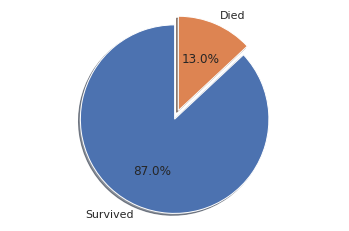

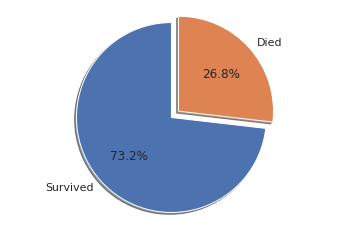

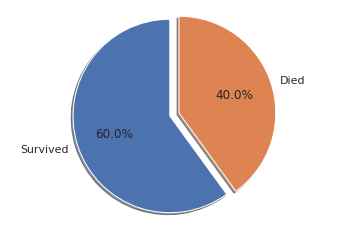

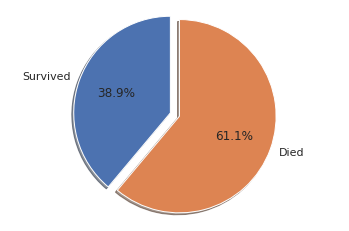

In [5]:
df2 = df[['Survived', 'Age']]
lt18s = df2.loc[df['Age'] <= 18, 'Survived'].sum()
hmlt18 = df2.loc[df['Age'] <= 18, 'Age'].count()

lt37s = df2.loc[(df['Age'] <= 37) & (df['Age'] > 18), 'Survived'].sum()
hmlt37 = df2.loc[(df['Age'] <= 37) & (df['Age'] > 18), 'Age'].count()

lt56s = df2.loc[(df['Age'] <= 56) & (df['Age'] > 37), 'Survived'].sum()
hmlt56 = df2.loc[(df['Age'] <= 56) & (df['Age'] > 37), 'Age'].count()

gt56s = df2.loc[df['Age'] > 56, 'Survived'].sum()
hmgt56 = df2.loc[df['Age'] > 56, 'Age'].count()

plt.clf()
plt.figure(0)
labels = 'Survived', 'Died'
sizes = lt18s/hmlt18, (hmlt18 - lt18s)/hmlt18
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis("equal")

plt.figure(1)
labels = 'Survived', 'Died'
sizes = lt37s/hmlt37, (hmlt37 - lt37s)/hmlt37
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis("equal")

plt.figure(2)
labels = 'Survived', 'Died'
sizes = lt56s/hmlt56, (hmlt56 - lt56s)/hmlt56
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis("equal")

plt.figure(3)
labels = 'Survived', 'Died'
sizes = gt56s/hmgt56, (hmgt56 - gt56s)/hmgt56
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis("equal")

plt.show()

In [6]:
# Make dataframe with independent vars
x = pd.DataFrame(df.iloc[:, (df.columns != 'Pclass') & (df.columns != 'Survived')])

# Make dataframe with dependent vars
y = pd.DataFrame(df.iloc[:,df.columns == 'Survived'])

x.head()

,Sex,Age,Cabin,Embarked
1,0,38.0,2,67
3,0,35.0,2,83
6,1,54.0,4,83
10,0,4.0,6,83
11,0,58.0,2,83


In [7]:
y.head()

,Survived
1,1
3,1
6,0
10,1
11,1


In [8]:
x.tail()

,Sex,Age,Cabin,Embarked
871,0,47.0,3,83
872,1,33.0,1,83
879,0,56.0,2,67
887,0,19.0,1,83
889,1,26.0,2,67


In [9]:
# split the data into train and test sets
x.reset_index()
y.reset_index()

x_train, x_test, y_train, y_test = train_test_split(x, y['Survived'], test_size=.2, random_state=1)


297    0
456    0
581    1
871    1
268    1
789    0
193    1
867    0
730    1
585    1
97     1
540    1
625    0
66     1
390    1
11     1
473    1
92     0
177    0
118    0
462    0
558    1
609    1
453    1
269    1
781    1
429    1
307    1
251    0
765    1
583    0
209    1
245    0
311    1
102    0
21     1
516    1
Name: Survived, dtype: int64


In [10]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [11]:
y_pred = model.predict(x_test)
print (y_pred)

[1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1]


In [12]:
print('Accuracy: %d', model.score(x_test, y_test))

Accuracy: %d 0.6756756756756757


In [13]:
from sklearn.metrics import confusion_matrix
confma = confusion_matrix(y_test, y_pred)
print(confma)

[[ 5  8]
 [ 4 20]]


In [14]:
# What the above confusion matrix shows is that there are 5 true positives, 20 true negatives
# 4 false positives and 8 false negatives
# This means that the model is overall more inclined to predict a survival than the opposite.